# Import needed libraries

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

pd.set_option('display.max_columns', 500)

# Read unique catalogue for Localitites.
File with all Localities in the country, their names, their coordinates, altitude, and some population data.

In [2]:
cat = pd.read_csv('/home/lore/Documents/DataMexico/catun_localidad.csv',
                 dtype={
                     'Mapa':str,
                     'Cve_Ent' : str,
                     'Cve_Mun' : str,
                     'Cve_Loc' : str
                 })

del cat['Latitud']
del cat['Longitud']

cat = cat.rename(columns={
    'Ámbito' : 'ambit',
    'Mapa'   : 'map',
    'Cve_Ent': 'ent_code',
    'Nom_Ent': 'ent_name',
    'Nom_Abr': 'ab_name',
    'Cve_Mun': 'mun_code',
    'Nom_Mun': 'mun_name',
    'Cve_Loc': 'loc_code',
    'Nom_Loc': 'loc_name',
    'Lat_Decimal' : 'latitude',
    'Lon_Decimal' : 'longitude',
    'Altitud' : 'altitude',
    'Cve_Carta': 'cart_code',
    'Pob_Total': 'total_pop',
    'Pob_Masculina' : 'male_pop',
    'Pob_Femenina' : 'female_pop',
    'Total De Viviendas Habitadas': 'total_inhabited_households'
})

print(cat.shape)
display(cat.head(1))

/home/lore/anaconda3/envs/data/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(304277, 17)


,map,ent_code,ent_name,ab_name,mun_code,mun_name,loc_code,loc_name,ambit,latitude,longitude,altitude,cart_code,total_pop,male_pop,female_pop,total_inhabited_households
0,010010001,01,Aguascalientes,Ags.,001,Aguascalientes,0001,Aguascalientes,U,21.879823,-102.296047,1878,F13D19,722250,348722,373528,185120


# Read shapefiles.
64 files, 32 with the AGEBs geometry for the urban areas and 32 with the AGEBs geometry for the rural areas.

In [3]:
# Lsit with all entities in the country

entidades = [
    '01_aguascalientes',
    '02_bajacalifornia', 
    '03_bajacaliforniasur',
    '04_campeche',
    '05_coahuiladezaragoza',
    '06_colima',
    '07_chiapas',
    '08_chihuahua',
    '09_ciudaddemexico',
    '10_durango',
    '11_guanajuato',
    '12_guerrero',
    '13_hidalgo',
    '14_jalisco',
    '15_mexico',
    '16_michoacandeocampo',
    '17_morelos',
    '18_nayarit',
    '19_nuevoleon',
    '20_oaxaca',
    '21_puebla',
    '22_queretaro',
    '23_quintanaroo',
    '24_sanluispotosi',
    '25_sinaloa',
    '26_sonora',
    '27_tabasco',
    '28_tamaulipas',
    '29_tlaxcala',
    '30_veracruzignaciodelallave',
    '31_yucatan',
    '32_zacatecas'
]

In [4]:
# Function to rename the columns in the shapefiles

def rename_shapefiles(df, area_type):
    df = df.rename(columns={
            'CVE_ENT'  : 'ent_code',
            'CVE_AGEB' : 'ageb_code',
            'CVE_MUN'  : 'mun_code',
        
        })
    
    if area_type == 'U':
        df = df.rename(columns={
            'CVE_LOC':'loc_code'
        })
       
        df['cvegeo_loc'] = df['ent_code'] + df['mun_code'] + df['loc_code']
        
    elif area_type == 'R':
        df =df.rename(columns={
            'CVEGEO':'cvegeo_ageb'
        })
        
    return df

In [5]:
rural_shapes = []
urban_shapes = []

for i in range(0,32):
    # Read the data for each entity. The data is divided in rural and urban.
    
    #print(i)
    urban_agebs = gpd.read_file('/home/lore/Documents/DataMexico/marco_geoestadistico_2018/'+entidades[i]+'/conjunto de datos/'+entidades[i][0:2]+'a'+'.shp')
    urban_agebs = rename_shapefiles(urban_agebs, 'U')
    
    rural_agebs = gpd.read_file('/home/lore/Documents/DataMexico/marco_geoestadistico_2018/'+entidades[i]+'/conjunto de datos/'+entidades[i][0:2]+'ar'+'.shp')
    rural_agebs = rename_shapefiles(rural_agebs, 'R')
    #print(rural_agebs.shape, urban_agebs.shape)
    
    urban_shapes.append(urban_agebs)
    rural_shapes.append(rural_agebs)


urban_shapes = pd.concat(urban_shapes)
rural_shapes = pd.concat(rural_shapes)

print(urban_shapes.shape, rural_shapes.shape)
display(urban_shapes.head(1))
display(rural_shapes.head(1))

(62280, 6) (17469, 5)


,ent_code,loc_code,mun_code,ageb_code,geometry,cvegeo_loc
0,01,0001,001,216A,"POLYGON ((2472175.610600002 1095222.905299999,...",010010001


,ent_code,mun_code,cvegeo_ageb,ageb_code,geometry
0,01,001,010011890,1890,"POLYGON ((2482927.470100001 1113504.856899999,..."


In [7]:
total = pd.concat([urban_shapes,rural_shapes])
print(total.shape)

(79749, 7)


/home/lore/anaconda3/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


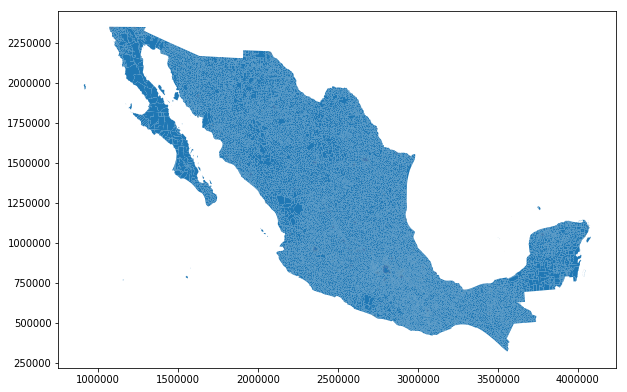

In [8]:
total.plot(figsize=(10,10))

# Urban 

In [7]:
# We filter from the cunique catalogue the localities which are in urban zones.

urban_catalogue = cat[cat.ambit == 'U']
print(urban_catalogue.shape)
display(urban_catalogue.head(1))

(4562, 17)


,map,ent_code,ent_name,ab_name,mun_code,mun_name,loc_code,loc_name,ambit,latitude,longitude,altitude,cart_code,total_pop,male_pop,female_pop,total_inhabited_households
0,010010001,01,Aguascalientes,Ags.,001,Aguascalientes,0001,Aguascalientes,U,21.879823,-102.296047,1878,F13D19,722250,348722,373528,185120


In [8]:
urban = urban_shapes[['cvegeo_loc','ageb_code','geometry']].merge(urban_catalogue, left_on='cvegeo_loc', right_on='map', how='outer')
print(urban.shape)
display(urban.head(1))

(62280, 20)


,cvegeo_loc,ageb_code,geometry,map,ent_code,ent_name,ab_name,mun_code,mun_name,loc_code,loc_name,ambit,latitude,longitude,altitude,cart_code,total_pop,male_pop,female_pop,total_inhabited_households
0,010010001,216A,"POLYGON ((2472175.610600002 1095222.905299999,...",010010001,01,Aguascalientes,Ags.,001,Aguascalientes,0001,Aguascalientes,U,21.879823,-102.296047,1878,F13D19,722250.0,348722.0,373528.0,185120.0


In [9]:
# Check for nulls
# Data which is in the Catalogue but not in the shapefiles

if urban[urban.ageb_code.isnull()].shape[0] != 0:
    print(urban[urban.ageb_code.isnull()].shape)
    display(urban[urban.ageb_code.isnull()].head())
          
else:
    print('No missing data')
# Data which is in the shapefiles but not in the Catalogue

if urban[urban.map.isnull()].shape[0] != 0:
    print(urban[urban.map.isnull()].shape)
    display(urban[urban.map.isnull()].head())
else:
    print('No missing data')

No missing data
(7, 20)


,cvegeo_loc,ageb_code,geometry,map,ent_code,ent_name,ab_name,mun_code,mun_name,loc_code,loc_name,ambit,latitude,longitude,altitude,cart_code,total_pop,male_pop,female_pop,total_inhabited_households
51146,260430488,248A,"POLYGON ((1641651.771499999 2147404.4529, 1641...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51147,260430488,2418,"POLYGON ((1641792.905199997 2147928.594900001,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51148,260430488,2352,"POLYGON ((1641649.330200002 2147600.407600001,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51149,260430488,2367,"POLYGON ((1640812.808700003 2147366.419799998,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51150,260430488,2422,"POLYGON ((1642420.4859 2147756.600400001, 1642...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Rural

In [10]:
# We filter from the cunique catalogue the localities which are in rural zones.

rural_catalogue = cat[cat.ambit == 'R']
print(rural_catalogue.shape)
display(rural_catalogue.head(1))

(299715, 17)


,map,ent_code,ent_name,ab_name,mun_code,mun_name,loc_code,loc_name,ambit,latitude,longitude,altitude,cart_code,total_pop,male_pop,female_pop,total_inhabited_households
1,010010094,01,Aguascalientes,Ags.,001,Aguascalientes,0094,Granja Adelita,R,21.871875,-102.373531,1902,F13D18,14,0,0,2


# Count Municipalities

In [14]:
# The Urban Municipalitites

urban_shapes['cvegeo_mun'] = urban_shapes['ent_code'] + urban_shapes['mun_code']
urban_municipalitites = urban_shapes[['cvegeo_mun','geometry']]
urban_municipalitites = urban_municipalitites.drop_duplicates('cvegeo_mun')
print(urban_municipalitites.shape)

(2463, 2)


In [15]:
# The Rural Mmunicipalities

rural_shapes['cvegeo_mun'] = rural_shapes['ent_code'] + rural_shapes['mun_code']
rural_municipalitites = rural_shapes[['cvegeo_mun', 'geometry']]
rural_municipalitites = rural_municipalitites.drop_duplicates('cvegeo_mun')
print(rural_municipalitites.shape)

(2444, 2)


In [16]:
municipalities = urban_municipalitites.merge(rural_municipalitites, on='cvegeo_mun', how='outer')
municipalities.shape

(2463, 3)

# Rural

In [30]:
# We filter from the cunique catalogue the localities which are in rural zones.

rural_catalogue = cat[cat.ambit == 'R']
print(rural_catalogue.shape)
display(rural_catalogue.head(1))

(299715, 17)


,map,ent_code,ent_name,ab_name,mun_code,mun_name,loc_code,loc_name,ambit,latitude,longitude,altitude,cart_code,total_pop,male_pop,female_pop,total_inhabited_households
1,010010094,01,Aguascalientes,Ags.,001,Aguascalientes,0094,Granja Adelita,R,21.871875,-102.373531,1902,F13D18,14,0,0,2


In [50]:
rural_shapes.shape

(17469, 6)

In [40]:
rural_catalogue.shape

(299715, 17)